    conda create --name mosaic_env_211004 python=3.8
    conda activate mosaic_env_211004

    conda install pandas matplotlib jupyter shapely
    ipython kernel install --name mosaic_env_211004 --user

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt

Create the shutter sequences

In [29]:
zpos = np.arange(-2,7,0.2)

print(f'{zpos.size} z positions')
print(f'{zpos.size*4} frames\n')

# 4 channels per position
for i in range(zpos.size):
    for _ in range(4):
        print(f'{zpos[i]:1.1f},',end='')
    print(' ',end='')

print('\n')
    
counter = 0
channel = [1,2,3,4]

for i in range(zpos.size):
    print(f'\n<!-- 637, 546, 488, 405, {zpos[i]:1.1f} um-->')
    for j in range(4):
        counter+=1
        print(f'  <event>')
        print(f'    <channel>{channel[j]}</channel>')
        print(f'    <power>1</power>')
        print(f'    <on>{counter-1:1.0f}</on>')
        print(f'    <off>{counter:1.0f}</off>')
        print(f'    <color>255,255,255</color>') 
        print(f'  </event>')

45 z positions
180 frames

-2.0,-2.0,-2.0,-2.0, -1.8,-1.8,-1.8,-1.8, -1.6,-1.6,-1.6,-1.6, -1.4,-1.4,-1.4,-1.4, -1.2,-1.2,-1.2,-1.2, -1.0,-1.0,-1.0,-1.0, -0.8,-0.8,-0.8,-0.8, -0.6,-0.6,-0.6,-0.6, -0.4,-0.4,-0.4,-0.4, -0.2,-0.2,-0.2,-0.2, -0.0,-0.0,-0.0,-0.0, 0.2,0.2,0.2,0.2, 0.4,0.4,0.4,0.4, 0.6,0.6,0.6,0.6, 0.8,0.8,0.8,0.8, 1.0,1.0,1.0,1.0, 1.2,1.2,1.2,1.2, 1.4,1.4,1.4,1.4, 1.6,1.6,1.6,1.6, 1.8,1.8,1.8,1.8, 2.0,2.0,2.0,2.0, 2.2,2.2,2.2,2.2, 2.4,2.4,2.4,2.4, 2.6,2.6,2.6,2.6, 2.8,2.8,2.8,2.8, 3.0,3.0,3.0,3.0, 3.2,3.2,3.2,3.2, 3.4,3.4,3.4,3.4, 3.6,3.6,3.6,3.6, 3.8,3.8,3.8,3.8, 4.0,4.0,4.0,4.0, 4.2,4.2,4.2,4.2, 4.4,4.4,4.4,4.4, 4.6,4.6,4.6,4.6, 4.8,4.8,4.8,4.8, 5.0,5.0,5.0,5.0, 5.2,5.2,5.2,5.2, 5.4,5.4,5.4,5.4, 5.6,5.6,5.6,5.6, 5.8,5.8,5.8,5.8, 6.0,6.0,6.0,6.0, 6.2,6.2,6.2,6.2, 6.4,6.4,6.4,6.4, 6.6,6.6,6.6,6.6, 6.8,6.8,6.8,6.8, 


<!-- 637, 546, 488, 405, -2.0 um-->
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>0</on>
    <off>1</off>
    <color>255,255,255</color>
  </ev

In [ ]:
# zpos = np.arange(-2,4,0.2)

# print(f'{zpos.size} z positions\n')


# # 3 channels per position
# for i in range(zpos.size):
#     for _ in range(3):
#         print(f'{zpos[i]:1.1f},',end='')
#     print(' ',end='')
    
# print('\n')

# counter = 0
# channel = [0,1,2]
# for i in range(30):
#     print(f'\n<!-- 748, 637, 546, {zpos[i]:1.1f} um-->')
#     for j in range(3):
#         counter+=1
#         print(f'  <event>')
#         print(f'    <channel>{channel[j]}</channel>')
#         print(f'    <power>1</power>')
#         print(f'    <on>{counter-1:1.0f}</on>')
#         print(f'    <off>{counter:1.0f}</off>')
#         print(f'    <color>255,255,255</color>') 
#         print(f'  </event>')

get positions

In [ ]:
# gridSize = 50
# notebookFolder = 'c:/Users/Leonardo/Dropbox/research/analysis/CNVs/notebook/210516_CNV007_DNA_FISH/'
# positionsFolder = 'c:/Software/merfish-parameters/positions/'
# imagingSettingsFolder = 'c:/Software/imaging-settings/210516_CNV007/' 
# experimentName = 'CNV007'
# sample = 1

In [10]:
sample = 1
expName = 'CNV030'
expDate = '211004'

In [11]:
notebookFolder = f'c:/Users/Leonardo/Dropbox/research/analysis/CNVs/notebook/{expDate}_{expName}_Testing_hTERT_cells/'
positionsFolder = f'c:/Software/merfish-parameters/positions/'
imagingSettingsFolder = f'c:/Software/imaging-settings/{expDate}_{expName}/' 

In [20]:
nrows = 10  # even number 
ncols = 12 # any number
dxy = 250 # separation between fov center (in microns)

In [21]:
X = []
Y = []

Xcoor = np.arange(-int(ncols/2),int(ncols/2),1)
Ycoor = np.arange(-int(nrows/2),int(nrows/2),1)

for i in Ycoor:
    if np.mod(i,2):
        currentXcoor = Xcoor
    else:
        currentXcoor = np.flip(Xcoor)
        
    for j in currentXcoor:
        Y.append(i*dxy)
        X.append(j*dxy)
        
for i in np.flip(Ycoor):
    Y.append(i*dxy)
    X.append((min(Xcoor)-1)*dxy)
    
    
positions = pd.DataFrame({'X':X,'Y':Y})

# save intermediateddata to image settings folder
outputName = f'positions_{expName}_{nrows}x{ncols+1}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

130 positions saved to c:/Software/imaging-settings/211004_CNV030/sample_01/positions_CNV030_10x13.txt!
130 positions saved to c:/Software/merfish-parameters/positions/positions_CNV030_10x13.txt!


<IPython.core.display.Javascript object>


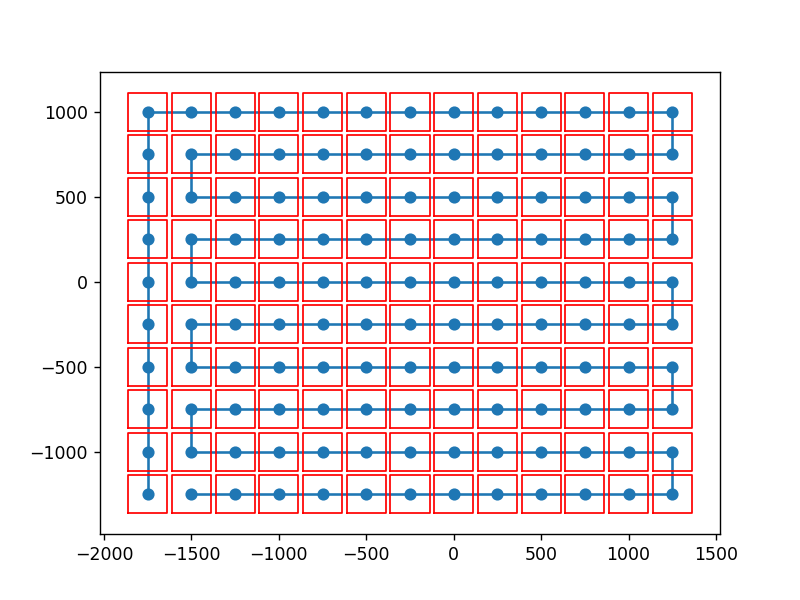

In [22]:
fig = plt.subplots()
plt.plot(X,Y,'o-')


fovPixels = 2048
micronPerPixel = 0.109
fovWidth = fovPixels*micronPerPixel
for i in range(len(X)):
    plt.plot([X[i]-fovWidth/2, X[i]+fovWidth/2, X[i]+fovWidth/2, X[i]-fovWidth/2, X[i]-fovWidth/2],
         [Y[i]-fovWidth/2, Y[i]-fovWidth/2, Y[i]+fovWidth/2, Y[i]+fovWidth/2, Y[i]-fovWidth/2], 'r-',lw=1)
    